In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
from datetime import datetime, timedelta
import os

In [71]:
DB = sqlite3.connect('varledronai.db')
C = DB.cursor()
sql="""SELECT * FROM dronai;"""
dfv = pd.read_sql_query(sql, con=DB)
dfv['kaina']=dfv['kaina'].astype(float)

In [72]:
DB = sqlite3.connect('pigudronai.db')
C = DB.cursor()
sql="""SELECT * FROM dronai;"""
dfp = pd.read_sql_query(sql, con=DB)
dfp = dfp.dropna(subset=['kaina'])
dfp['kaina'] = dfp['kaina'].apply(lambda x: str(x).replace(' ', ''))
dfp['kaina']=dfp['kaina'].astype(float)

In [73]:
dfv1 = dfv[['kaina', 'gamintojas']]
dfv1['pardavejas'] = 'varle.lt'
dfp1 = dfp[['kaina', 'prekės ženklas:']]
dfp1['pardavejas'] = 'pigu.lt'
dfp1.rename(columns={'prekės ženklas:': 'gamintojas'}, inplace=True)

spalvukiek = dfv1['gamintojas'].value_counts()
spalvukiek = spalvukiek[spalvukiek > 3].index
dfv1 = dfv1[dfv1['gamintojas'].isin(spalvukiek)]

spalvukiek = dfp1['gamintojas'].value_counts()
spalvukiek = spalvukiek[spalvukiek > 3].index
dfp1 = dfp1[dfp1['gamintojas'].isin(spalvukiek)]

dfpv1= pd.concat([dfv1, dfp1], axis=0, ignore_index=True)

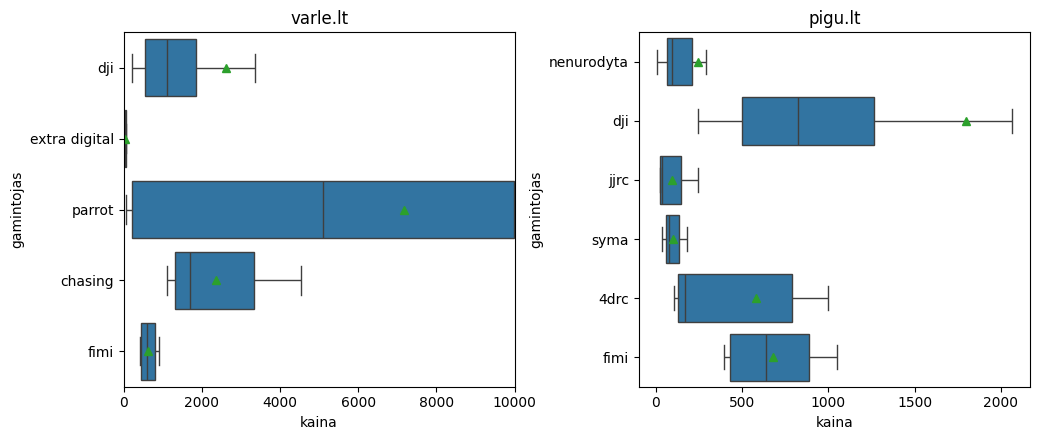

In [74]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10.5, 4.5))
sns.boxplot(data=dfv1, y='gamintojas', x='kaina', showmeans=True, showfliers=False, ax=axis1)
sns.boxplot(data=dfp1, y='gamintojas', x='kaina', showmeans=True, showfliers=False, ax=axis2)
axis1.set_title('varle.lt')
axis2.set_title('pigu.lt')
fig.tight_layout()
axis1.set_xlim(0, 10000)
plt.show()

In [75]:
dfv2=dfv[['kaina', 'didžiausias skrydžio laikas']]
dfp2=dfp[['kaina', 'skraidymo laikas:']]
dfv2.rename(columns={'didžiausias skrydžio laikas': 'skraidymo laikas:'}, inplace=True)

dfpv2= pd.concat([dfv2, dfp2], axis=0, ignore_index=True)

dfpv2 = dfpv2.dropna(subset=['skraidymo laikas:'])
dfpv2['skraidymo laikas:'] = dfpv2['skraidymo laikas:'].str.replace(
    r'\b(minutes|min\.|minučių|minutė|)\b', '', regex=True
).str.strip()

dfpv2['skraidymo laikas:'] = (
    dfpv2['skraidymo laikas:']
    .str.strip()
    .str.replace(r'\s*min\*?', '', regex=True) 
)
dfpv2['skraidymo laikas:'] = dfpv2['skraidymo laikas:'].replace(['', '-', '.', '-.'], None)
dfpv2 = dfpv2.dropna(subset=['skraidymo laikas:'])
dfpv2['skraidymo laikas:']=dfpv2['skraidymo laikas:'].astype(float)


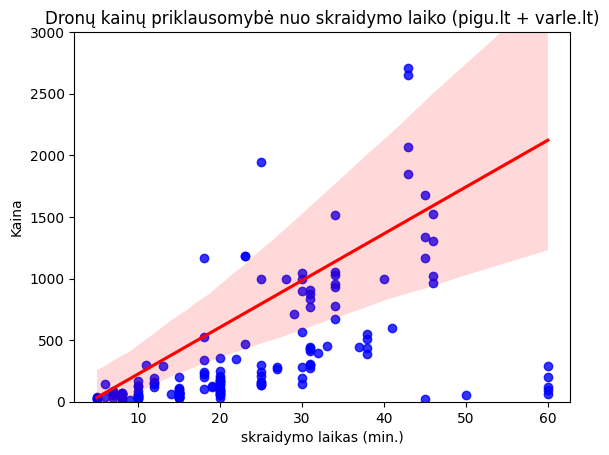

In [76]:
fig, ax = plt.subplots()
sns.regplot(data=dfpv2,x='skraidymo laikas:', y='kaina', order=1, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax.set_xlabel('skraidymo laikas (min.)')
ax.set_ylabel('Kaina')
# ax.set_xlim(30, 55)
ax.set_ylim(0, 3000)
plt.title('Dronų kainų priklausomybė nuo skraidymo laiko (pigu.lt + varle.lt)')
plt.show()

In [ ]:
dfp3 = dfp[['kaina', 'veikimo atstumas:']]
dfp3 = dfp3.dropna(subset=['veikimo atstumas:'])
dfp3['veikimo atstumas:']=dfp3['veikimo atstumas:'].apply(lambda x: x.replace(' ','').replace('m', '').replace('-',''))
dfp3['veikimo atstumas:'] = dfp3['veikimo atstumas:'].replace([' ', '-', ''], None)
dfp3 = dfp3.dropna(subset=['veikimo atstumas:'])
dfp3['veikimo atstumas:']=dfp3['veikimo atstumas:'].astype(float)

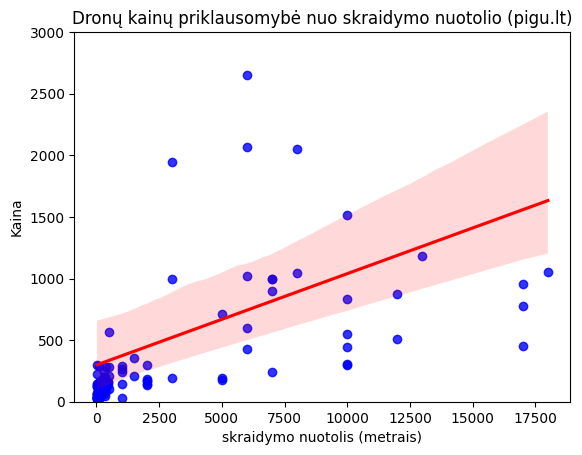

In [78]:
fig, ax = plt.subplots()
sns.regplot(data=dfp3,x='veikimo atstumas:', y='kaina', order=1, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax.set_xlabel('skraidymo nuotolis (metrais)')
ax.set_ylabel('Kaina')
# ax.set_xlim(30, 55)
ax.set_ylim(0, 3000)
plt.title('Dronų kainų priklausomybė nuo skraidymo nuotolio (pigu.lt)')
plt.show()

In [79]:
dfv3 = dfv[['kaina', 'svoris (su baterija, g)']]
dfp3=dfp[['kaina', 'svoris:']]
dfv3.rename(columns={'svoris (su baterija, g)': 'svoris:'}, inplace=True)
dfpv3= pd.concat([dfv3, dfp3], axis=0, ignore_index=True)

dfpv3['svoris:']=dfpv3['svoris:'].apply(lambda x: str(x).replace(' ','').replace('g', '').replace('-',''))
dfpv3['svoris:'] = dfpv3['svoris:'].replace([' ', '-', '','None'], None)
dfpv3 = dfpv3.dropna(subset=['svoris:'])
dfpv3['svoris:'] = pd.to_numeric(dfpv3['svoris:'], errors='coerce')


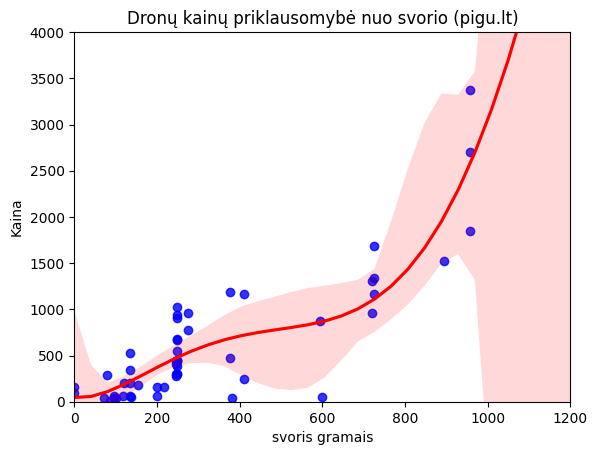

In [80]:
fig, ax = plt.subplots()
sns.regplot(data=dfpv3,x='svoris:', y='kaina', order=6, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax.set_xlabel('svoris gramais')
ax.set_ylabel('Kaina')
ax.set_xlim(0, 1200)
ax.set_ylim(0, 4000)
plt.title('Dronų kainų priklausomybė nuo svorio (pigu.lt)')
plt.show()

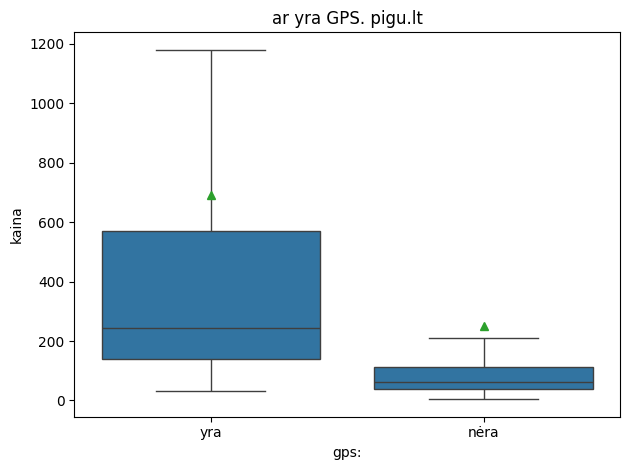

In [81]:
dfp4=dfp[['kaina', 'gps:']]
dfp4['gps:']=dfp4['gps:'].str.replace('nenurodyta', 'nėra')

fig, ax = plt.subplots()
sns.boxplot(data=dfp4, y='kaina', x='gps:', showmeans=True, showfliers=False, ax=ax)
ax.set_title('ar yra GPS. pigu.lt')
fig.tight_layout()
# ax.set_xlim(0, 10000)
plt.show()

In [99]:
dfv5=dfv[['kaina', 'didžiausias skrydžio laikas', 'perdavimo atstumas (lauke ir be kliūčių)', 'svoris (su baterija, g)', 'gps', 'stabilizavimas']]
dfp5=dfp[['kaina', 'skraidymo laikas:', 'veikimo atstumas:', 'svoris:', 'gps:', 'skrydžio stabilizacija:']]
dfv5.rename(columns={'didžiausias skrydžio laikas': 'skraidymo laikas:'}, inplace=True)
dfv5.rename(columns={'perdavimo atstumas (lauke ir be kliūčių)': 'veikimo atstumas:'}, inplace=True)
dfv5.rename(columns={'svoris (su baterija, g)': 'svoris:'}, inplace=True)
dfv5.rename(columns={'gps': 'gps:'}, inplace=True)
dfp5.rename(columns={'skrydžio stabilizacija:': 'stabilizavimas'}, inplace=True)

dfpv5= pd.concat([dfv5, dfp5], axis=0, ignore_index=True)

In [100]:
dfpv5['skraidymo laikas:']=dfpv5['skraidymo laikas:'].apply(lambda x: str(x).replace(' ','').replace('minutes', '').replace('minutė',''))
dfpv5['skraidymo laikas:']=dfpv5['skraidymo laikas:'].apply(lambda x: str(x).replace('minučių','').replace('min.', '').replace('-min.','').replace('-', ''))
dfpv5['skraidymo laikas:'] = dfpv5['skraidymo laikas:'].replace(['', ' ', 'None'], None)
# dfpv5['skraidymo laikas:'] = dfpv5['skraidymo laikas:'].apply(lambda x: float(x))
dfpv5['veikimo atstumas:'] = dfpv5['veikimo atstumas:'].apply(lambda x: str(x).split(',')[0])
dfpv5['veikimo atstumas:']=dfpv5['veikimo atstumas:'].apply(lambda x: str(x).replace('ce:','').replace('eb:', '').replace('m','').replace(' ', ''))
dfpv5['veikimo atstumas:']=dfpv5['veikimo atstumas:'].apply(lambda x: str(x).replace('fcc:','').replace('-', ''))
dfpv5['veikimo atstumas:'] = dfpv5['veikimo atstumas:'].replace(['', ' ', 'None'], None)
# dfpv5['skraidymo laikas:'] = dfpv5['skraidymo laikas:'].apply(lambda x: float(x))
# dfp3 = dfp3.dropna(subset=['veikimo atstumas:'])
dfpv5['svoris:']=dfpv5['svoris:'].apply(lambda x: str(x).replace('g','').replace(' ', '').replace('-', ''))
dfpv5['svoris:'] = dfpv5['svoris:'].apply(lambda x: float(x)*1000 if '.' in str(x) else x)
dfpv5['svoris:'] = dfpv5['svoris:'].replace(['', ' ', 'None'], None)

dfpv5['gps:']=dfpv5['gps:'].apply(lambda x: str(x).replace('taip','yra').replace('nenurodyta', 'nėra').replace('-', ''))
dfpv5['gps:'] = dfpv5['gps:'].replace(['', ' ', 'None'], None)

dfpv5['stabilizavimas']=dfpv5['stabilizavimas'].apply(lambda x: str(x).replace('3 ašių (3-axis)','yra').replace('nenurodyta', 'nėra').replace('vienos ašies', ''))
dfpv5['stabilizavimas'] = dfpv5['stabilizavimas'].replace(['', ' ', 'None'], None)

In [101]:
dfpv5['kaina100']=dfpv5['kaina'].apply(lambda x: np.ceil(x/100)*100)
dfpv5['kaina100']=dfpv5['kaina100'].apply(lambda x: x if x<700 else 700 )
dfpv5['kaina100']=dfpv5['kaina100'].apply(lambda x: 400 if x==300 else x )
dfpv5['kaina100']=dfpv5['kaina100'].apply(lambda x: 600 if x==500 else x )

In [ ]:
def skraidymolaikas(df, eur):
    skraidymo_laikas= df
    skraidymo_laikas = skraidymo_laikas[skraidymo_laikas['kaina100'] == eur][['skraidymo laikas:']]
    skraidymo_laikas = skraidymo_laikas.dropna(subset=['skraidymo laikas:'])
    skraidymo_laikas['skraidymo laikas:'] = skraidymo_laikas['skraidymo laikas:'].astype(float)
    skraidymo_laikas= round(skraidymo_laikas['skraidymo laikas:'].mean())
    return skraidymo_laikas
def veikimoatstumas(df, eur):
    veikimo_atstumas = df
    veikimo_atstumas = veikimo_atstumas[veikimo_atstumas['kaina100'] == eur][['veikimo atstumas:']]
    veikimo_atstumas = veikimo_atstumas.dropna(subset=['veikimo atstumas:'])
    veikimo_atstumas['veikimo atstumas:'] = veikimo_atstumas['veikimo atstumas:'].astype(float)
    veikimo_atstumas= round(veikimo_atstumas['veikimo atstumas:'].mean())
    return veikimo_atstumas
def svoris(df, eur):
    svoris = df
    svoris = svoris[svoris['kaina100'] == eur][['svoris:']]
    svoris = svoris.dropna(subset=['svoris:'])
    svoris['svoris:'] = svoris['svoris:'].astype(float)
    svoris= round(svoris['svoris:'].mean()) 
    return svoris
def gps(df, eur):
    gps = df
    gps = gps[gps['kaina100'] == eur][['gps:']]
    gpsyra = len(gps[gps['gps:'] == 'yra'])
    gpsnera = len(gps[gps['gps:'] == 'nėra'])
    gps = round(gpsyra/(gpsyra+ gpsnera)*100)
    return gps
def stabilizavimas(df, eur):
    stabilizavimas = df
    stabilizavimas = stabilizavimas[stabilizavimas['kaina100'] == eur][['stabilizavimas']]
    stabilizavimasyra = len(stabilizavimas[stabilizavimas['stabilizavimas'] == 'yra'])
    stabilizavimasnera = len(stabilizavimas[stabilizavimas['stabilizavimas'] == 'nėra'])
    stabilizavimas = round(stabilizavimasyra/(stabilizavimasyra+ stabilizavimasnera)*100)
    return stabilizavimas

In [171]:
for i in [100, 200, 400, 600, 700]:
    print(f'tikėtinas dronas, kurio vertė iki  {i}')
    print('skraidymo laikas:', skraidymolaikas(dfpv5, i))
    print('veikimo atstumas:', veikimoatstumas(dfpv5, i))
    print('svoris:', svoris(dfpv5, i))
    print('gps tikimybė:', gps(dfpv5, i))
    print('stabilizatoriaus tikimybė:', stabilizavimas(dfpv5, i))

tikėtinas dronas, kurio vertė iki  100
skraidymo laikas: 15
veikimo atstumas: 119
svoris: 359
gps tikimybė: 21
stabilizatoriaus tikimybė: 54
tikėtinas dronas, kurio vertė iki  200
skraidymo laikas: 21
veikimo atstumas: 997
svoris: 154
gps tikimybė: 63
stabilizatoriaus tikimybė: 58
tikėtinas dronas, kurio vertė iki  400
skraidymo laikas: 26
veikimo atstumas: 2887
svoris: 222
gps tikimybė: 79
stabilizatoriaus tikimybė: 86
tikėtinas dronas, kurio vertė iki  600
skraidymo laikas: 32
veikimo atstumas: 9136
svoris: 250
gps tikimybė: 100
stabilizatoriaus tikimybė: 83
tikėtinas dronas, kurio vertė iki  700
skraidymo laikas: 35
veikimo atstumas: 9000
svoris: 728
gps tikimybė: 80
stabilizatoriaus tikimybė: 78


In [114]:
dfpv5

,kaina,skraidymo laikas:,veikimo atstumas:,svoris:,gps:,stabilizavimas,kaina100
0,1029.99,34,10000,249,None,yra,700.0
1,275.99,31,6000,246,None,yra,400.0
2,385.71,38,6000,248,None,yra,400.0
3,409.99,31,6000,246,None,yra,600.0
4,95.92,None,None,None,None,None,100.0
...,...,...,...,...,...,...,...
255,159.00,25,450,None,yra,nėra,200.0
256,62.00,8,20,None,nėra,yra,100.0
257,392.00,32,None,None,yra,yra,400.0
258,36.00,6,30,None,nėra,nėra,100.0
